# CSIRO-BioMass

## Introduction
This project, is to build models the predict the biomass from images, ground-truth measurments, and etc. Basically, this helps farmers to determine if and when to graze their livestocks.

## Process
1. EDA
2. Dataset Overview: 
    - The dataset won't be shared or distributed to any public or private repos, in adherence with the competition rules or regulations; only exception is the pretraining dataset if going that route.
    - The dataset comprises of these columns:
        - **train/**: contains the images used for training.
        - **test/**: contains the images used for testing
        - **train.csv**:
           - sample_id — Unique identifier for each training sample (image).
           - image_path — Relative path to the training image (e.g., images/ID1098771283.jpg).
           - Sampling_Date — Date of sample collection.
           - State — Australian state where sample was collected.
           - Species — Pasture species present, ordered by biomass (underscore-separated).
           - Pre_GSHH_NDVI — Normalized Difference Vegetation Index (GreenSeeker) reading.
           - Height_Ave_cm — Average pasture height measured by falling plate (cm).
           - target_name — Biomass component name for this row (Dry_Green_g, Dry_Dead_g, Dry_Clover_g, GDM_g, or Dry_Total_g).
           - target — Ground-truth biomass value (grams) corresponding to target_name for this image.
3. Model Training Process: 
    - Ensemble based model
        - An image model like a CNN, that is either pretrained or trained on the image_path cols.
        - **Without pre-training the model:** Make the model based on the
        
        - **Pretraining Process:**
            - To find already pre-trained model based on images, then finetune the model
            - To find other high-quality grass images based on most of the species and their status (Dry, Green, Dead) of the grass images, either supervised or unsupervised (Mostly unsupervised).
        - **Output:** A numerical representation of the predicted species of grass.
        - Use the **output** with other models like tree based models or other complex model for the final output.
            - A **csv** file that contains the sample_id & the predicted biomass
## Output
A csv file containing the **sample_id** & **predicted_biomass**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

## EDA

In [2]:
train_df = pd.read_csv('../data/train.csv')
train_df.head(5)

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


In [3]:
train_df.shape

(1785, 9)

### Distributions

#### Response Variable

Text(0.5, 1.0, 'Distribution of Target')

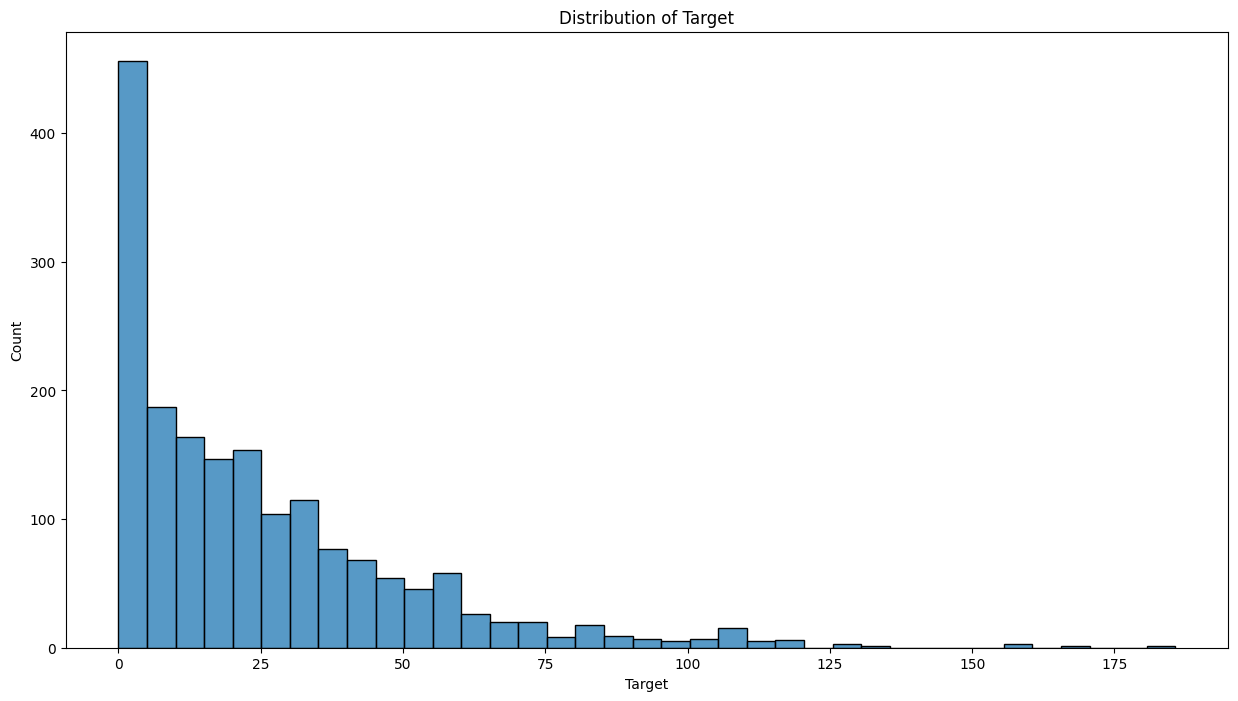

In [5]:
plt.figure(figsize=(15,8))
sns.histplot(train_df, x = "target")
plt.ylabel("Count")
plt.xlabel("Target")
plt.title("Distribution of Target")

In [7]:
## Count of unique vals

train_df.nunique()

sample_id        1785
image_path        357
Sampling_Date      28
State               4
Species            15
Pre_GSHH_NDVI      65
Height_Ave_cm      81
target_name         5
target           1328
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      1785 non-null   object 
 1   image_path     1785 non-null   object 
 2   Sampling_Date  1785 non-null   object 
 3   State          1785 non-null   object 
 4   Species        1785 non-null   object 
 5   Pre_GSHH_NDVI  1785 non-null   float64
 6   Height_Ave_cm  1785 non-null   float64
 7   target_name    1785 non-null   object 
 8   target         1785 non-null   float64
dtypes: float64(3), object(6)
memory usage: 125.6+ KB


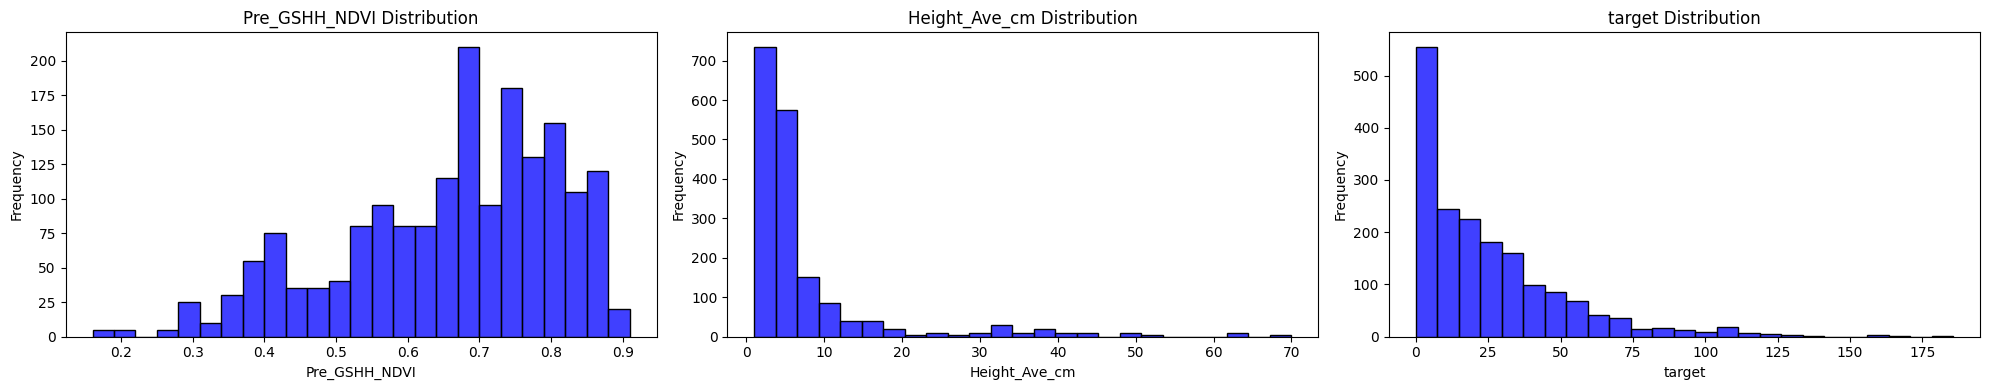

In [20]:

numeric_cols = train_df.select_dtypes(include='number').columns.to_list()

num_cols = 3
num_rows = int(np.ceil(len(numeric_cols) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))
axs = axs.flatten()

for idx, col in enumerate(numeric_cols):
    data = train_df[col].dropna()
    sns.histplot(x=data, bins=25, color='blue', edgecolor='black', ax=axs[idx])
    axs[idx].set_xlabel(col)
    axs[idx].set_ylabel("Frequency")
    axs[idx].set_title(f"{col} Distribution")

# Hide empty subplots
for ax in axs[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Analysis

Based on this distribution we can identify that most if not all the data is very skewed. Need to probably use some box-cox transformation or some other transformation to make the data a bit more normal. Furthermore, since these distributions are skewed either to left or to the right. Furthermore, there is also imbalance in the target (biomass).


#### Plans
